## 3. X: 주파수 영역에서의 원본 이미지

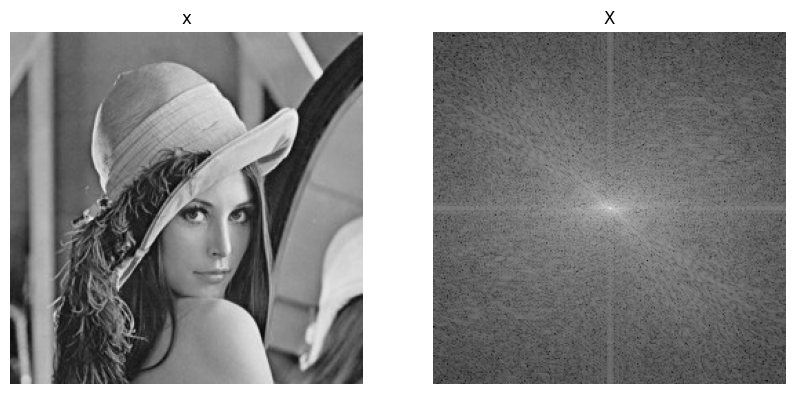

In [1]:
import cv2
import numpy.fft as fp
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 이미지 읽기
x = cv2.imread('./img/lena.jpg', cv2.IMREAD_GRAYSCALE)

# 주파수 영역으로 변환
X = fp.fft2(x)
X_mag = 20 * np.log10(0.1 + fp.fftshift(X))

# 원본
plt.figure(figsize=(10,20))
plt.subplot(121), plt.imshow(x, 'gray'), plt.title("x"), plt.axis("off")
plt.subplot(122), plt.imshow(X_mag.real, 'gray'), plt.title("X"), plt.axis("off")
plt.show()

## 1~2. G: 주파수 영역에서의 가우시안 필터

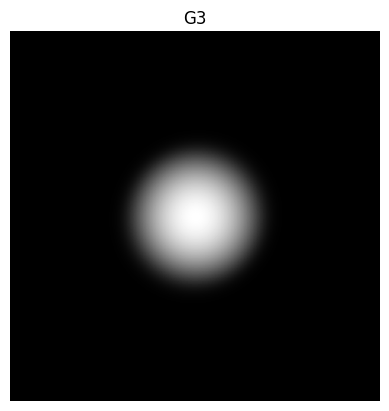

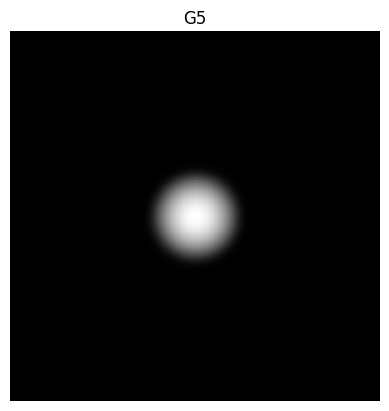

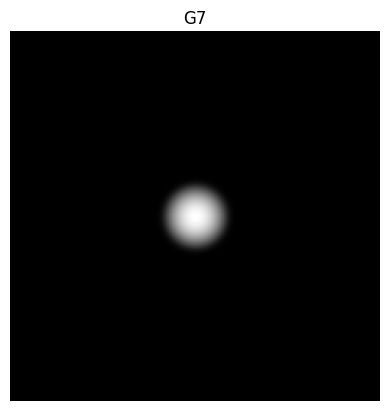

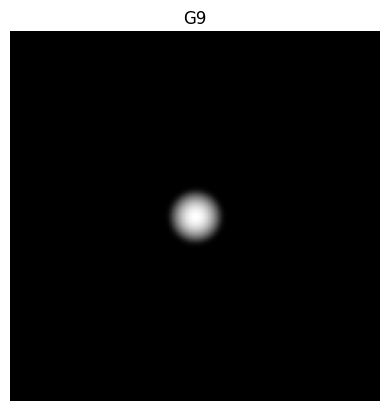

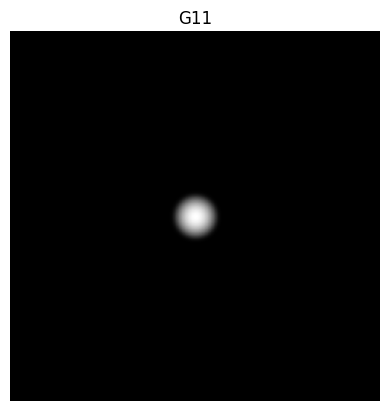

In [2]:
# 가우시안 필터
sig = [3, 5, 7, 9, 11]
G = {f"{s}": [] for s in sig}
for i, s in enumerate(sig):
    gauss = np.outer(signal.gaussian(x.shape[0], s), signal.gaussian(x.shape[1], s))
    G[f"{s}"] = fp.fft2(fp.ifftshift(gauss))
    G_mag = 20 * np.log10(0.1 + fp.fftshift(G[f"{s}"]))
    plt.imshow(G_mag.real, 'gray'), plt.title(f"G{s}"), plt.axis("off")
    plt.show()

# 4. Y: X와 G 컨볼루션

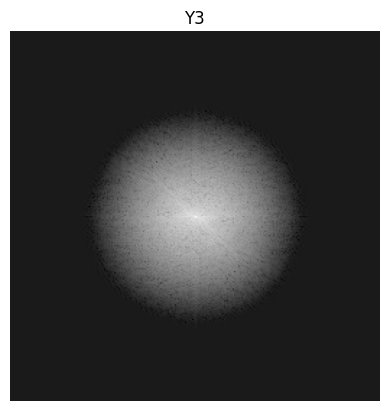

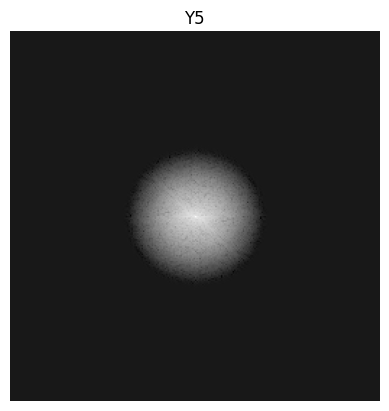

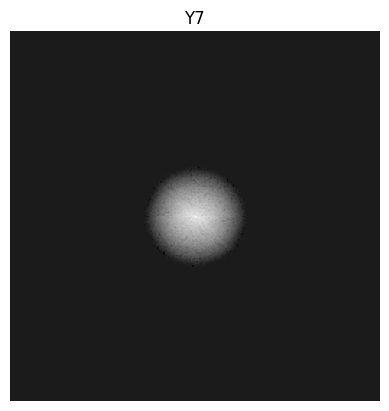

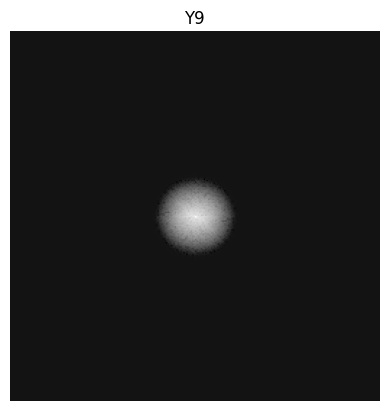

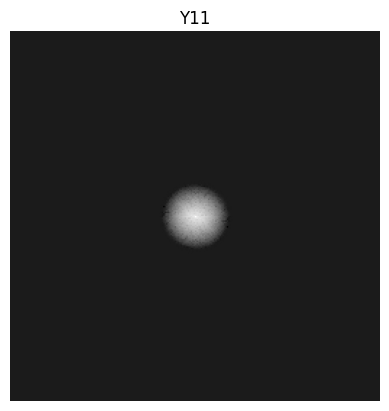

In [3]:
Y = {f"{s}": [] for s in sig}
for i, s in enumerate(sig):
    Y[f"{s}"] = X * G[f"{s}"]
    Y_mag = 20 * np.log10(0.1 + fp.fftshift(Y[f"{s}"]))
    plt.imshow(Y_mag.real, 'gray'), plt.title(f"Y{s}"), plt.axis("off")
    plt.show()

# 5. g: G 역푸리에

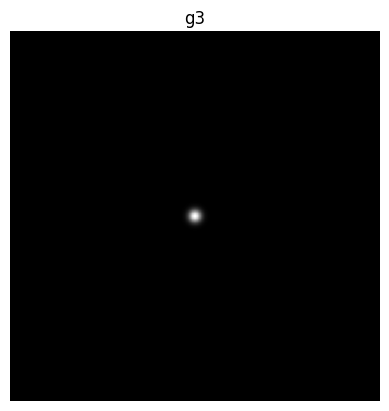

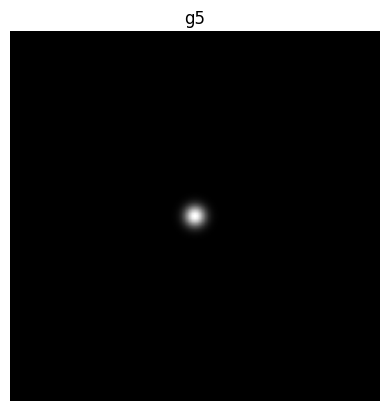

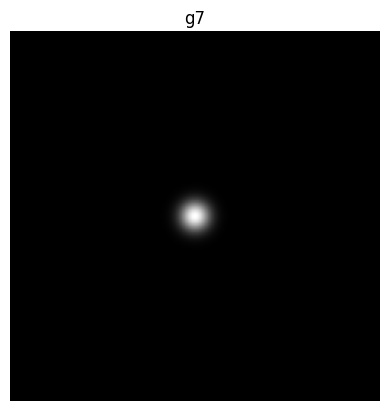

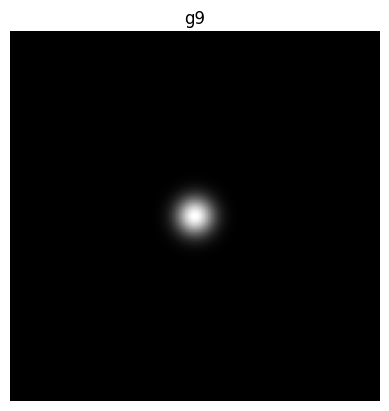

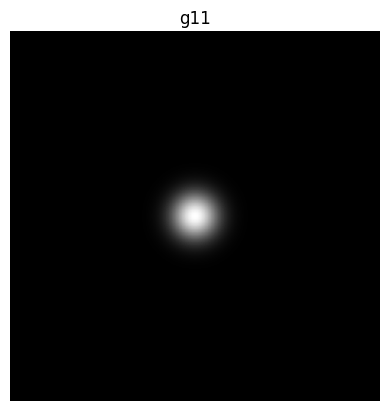

In [4]:
g = {f"{s}": [] for s in sig}
for i, s in enumerate(sig):
    g[f"{s}"] = fp.fftshift(fp.ifft2(G[f"{s}"])).real
    plt.imshow(g[f"{s}"], 'gray'), plt.title(f"g{s}"), plt.axis("off")
    plt.show()

# 6 y: x와 g 컨볼루션

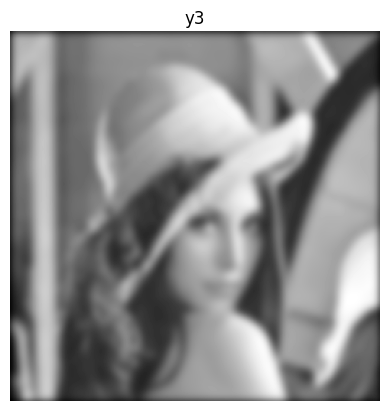

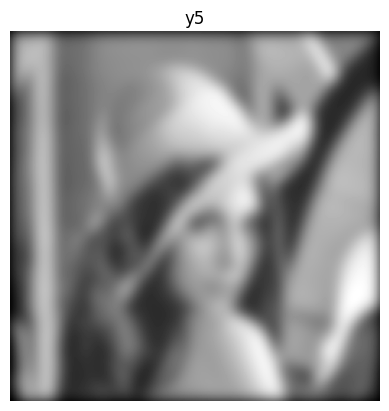

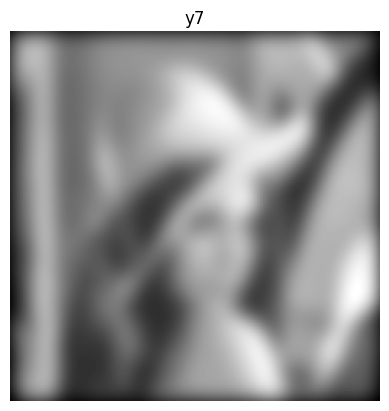

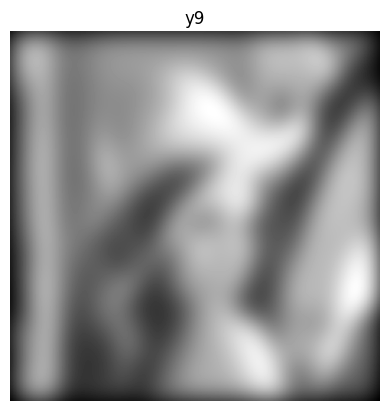

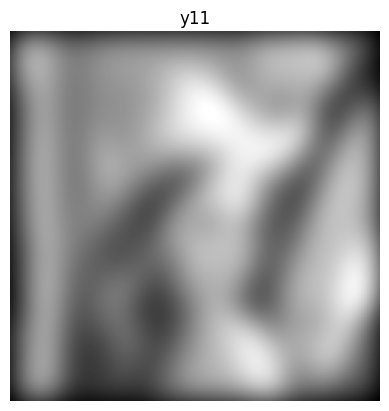

In [5]:
y = {f"{s}": [] for s in sig}
for i, s in enumerate(sig):
    y[f"{s}"] = signal.convolve2d(x, g[f"{s}"], mode='same')
    plt.imshow(y[f"{s}"], 'gray'), plt.title(f"y{s}"), plt.axis("off")
    plt.show()

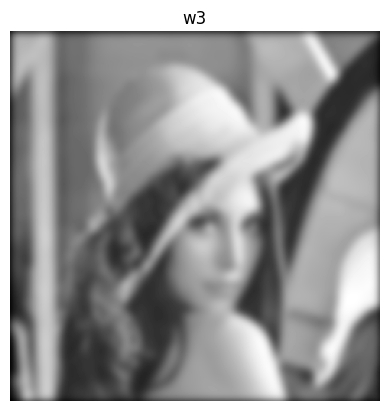

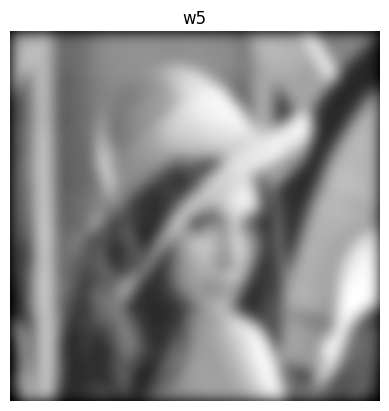

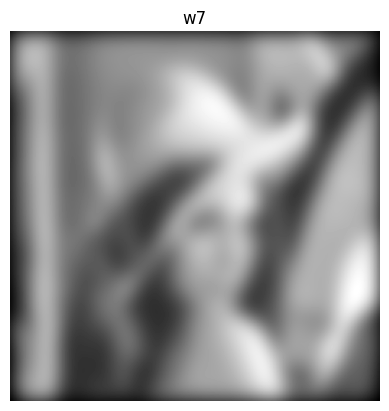

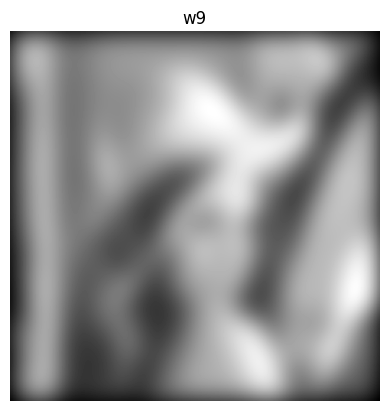

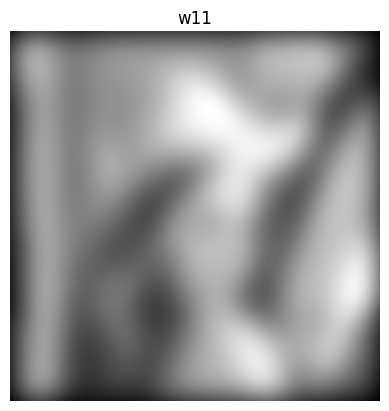

In [6]:
w = {f"{s}": [] for s in sig}
for i, s in enumerate(sig):
    gauss = np.outer(signal.gaussian(x.shape[0], s), signal.gaussian(x.shape[1], s))
    w[f"{s}"] = signal.convolve2d(x, gauss, mode='same')
    plt.imshow(w[f"{s}"], 'gray'), plt.title(f"w{s}"), plt.axis("off")
    plt.show()